<a href="https://colab.research.google.com/github/ShashankDhulipala/Clustering/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING THE DATA

Importing the required libraries

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans



Pandas for file operations.

Matplotlib,plotly,seaborn for visualization

SKlearn for doing Kmeans clustering

In [353]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Mall_Customers.csv")

Reading the file from the drive

In [355]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [357]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Elbow method for the selection of number of clusteres to be selected

In [358]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
    sse.append(km.inertia_)

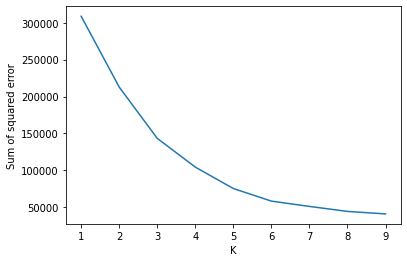

In [359]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

By using elbow method we say that, there is bend at 2,3,5

So, We are preparing 3 models

1.   With 2 clusters(model 1)
2.   With 3 clusters(model 2)

1.   With 5 clusters(model 3)






In [360]:
px.bar(df,x="Annual Income (k$)",y="Spending Score (1-100)",color="Age",facet_row="Gender")

By observing the above bar graph we can see that,By taking the age in parameters we are not able to cluster the data that means we are not able to segregate the data based on age. 

We cannot come to conclusion with one graph lets see more

In [361]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


We can see that 
 min age is 18 

min to 25%=28

50% to 75%=49

75% to max=70

 So if we take 50% as the mid point 

50%-min=36-18=18(this falls under the left to the 50%)

max-50%=70-36=34(this falls under right to the 50%)
 
 This tells us that the graph is right skewed. So, that causes the distortions in the data if we consider the age as parameter. 



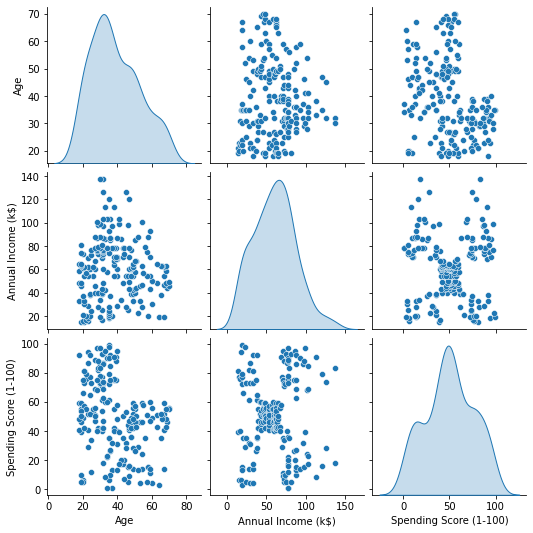

In [362]:

sns.pairplot(df[['Age','Annual Income (k$)',"Spending Score (1-100)"]],diag_kind='kde')

We can see that the age is right skewed

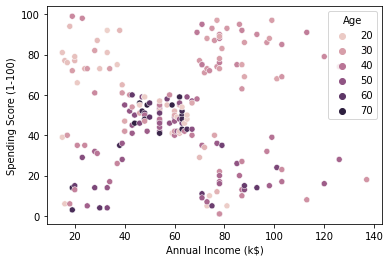

In [363]:
sns.scatterplot(x="Annual Income (k$)",hue="Age",data=df,y="Spending Score (1-100)")

Distortions in the data are seen if age is taken as parameter ,perhaps clustering is not possible. 

# KMEANS CLUSTERING WITH CLUSTERS N=2

In [364]:
km1=KMeans(n_clusters=2)
y_pred=km1.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

Adding the predicted values to the y_pred and adding new column to the dataset named "cluster"

In [365]:
df['cluster']=y_pred

In [366]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [367]:
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,1
96,97,Female,47,60,47,1
97,98,Female,27,60,50,1
98,99,Male,48,61,42,1


In [368]:
km1.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

In [369]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]



Creating a dataframe with new clustered data. 

2 dataframes with 0 and 1 as values

In [370]:
km1.cluster_centers_[:,0]

array([37.28888889, 79.6       ])

In [371]:
km1.cluster_centers_[:,1]

array([50.28888889, 50.12727273])

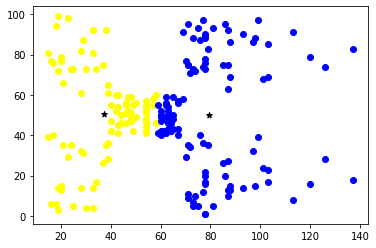

In [372]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='yellow')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='Blue')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color="Black",label="centroid",marker="*")

We have taken 2 clusters So, the data is clustered into 2 clusters the yellow points indicate cluster value 0 and blue points indicate cluster value 1.

Here we can see that cluster value 1 that is blue points gives us the information that the persons who have more income spends more and the number of people under cluster 1 are also more .

The cluster value 0 that is yellow points gives us the information that the persons who have less income spends more and the number of poeple under cluster 0 are also less

In [373]:
df['cluster'].value_counts()

1    110
0     90
Name: cluster, dtype: int64

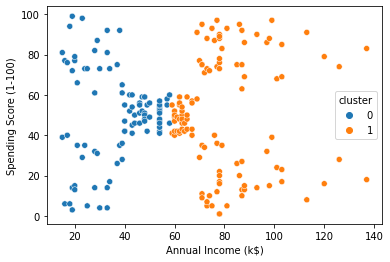

In [374]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',data=df)

Representing same scatter plot using seaborn library

# KMEANS CLUSTERING WITH CLUSTERS N=3

In [375]:
km3=KMeans(n_clusters=3)
y_pred2=km3.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [376]:
df["cluster1"]=y_pred2

Creating new column named "cluster1" which is the predicted output for clusters=3

In [377]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [378]:
df.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster1
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
5,6,Female,22,17,76,0,0
6,7,Female,35,18,6,0,0
7,8,Female,23,18,94,0,0
8,9,Male,64,19,3,0,0
9,10,Female,30,19,72,0,0


In [379]:
df3=df[df.cluster1==0]
df4=df[df.cluster1==1]
df5=df[df.cluster1==2]

Adding the cluster values 0,1,2 to the new dataframes df3,df4,df5

In [380]:
km3.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

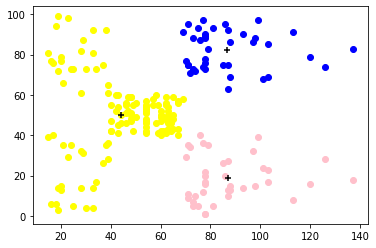

In [381]:
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="yellow")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='pink')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color="black",label="centroid",marker="+")

In [382]:
df['cluster1'].value_counts()

0    123
1     39
2     38
Name: cluster1, dtype: int64

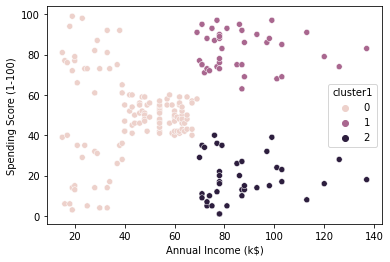

In [383]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster1',data=df)

What we can understand from the above graph is cluster1 having values 0 tells us that the spending is low and the income is high 

cluster1 having values 1 tells us that the income is high and spendings are also high.

cluster1 having vlaues 2 tells us that we have customers whose  income and spending are high and low that means we have all type of customers.

# KMEANS CLUSTERING WITH CLUSTERS N=5

In [384]:
km2=KMeans(n_clusters=5)
y_pred1=km2.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [385]:
df["cluster2"]=y_pred1

Adding new column to dataset that is cluster2

In [386]:
y_pred1

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [387]:
df.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster1,cluster2
0,1,Male,19,15,39,0,0,1
1,2,Male,21,15,81,0,0,3
2,3,Female,20,16,6,0,0,1
3,4,Female,23,16,77,0,0,3
4,5,Female,31,17,40,0,0,1
5,6,Female,22,17,76,0,0,3
6,7,Female,35,18,6,0,0,1
7,8,Female,23,18,94,0,0,3
8,9,Male,64,19,3,0,0,1
9,10,Female,30,19,72,0,0,3


In [388]:
df6=df[df.cluster2==0]
df7=df[df.cluster2==1]
df8=df[df.cluster2==2]
df9=df[df.cluster2==3]
df10=df[df.cluster2==4]

Creating dataframes with the clustered values 0,1,2,3,4 each that is df6,df6,df8,df9,df10.

In [389]:
km2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

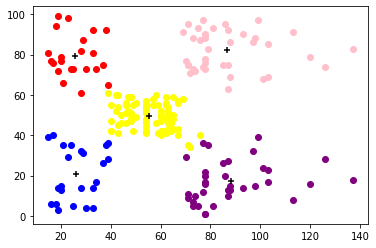

In [390]:
plt.scatter(df6["Annual Income (k$)"],df6["Spending Score (1-100)"],color="yellow")
plt.scatter(df7["Annual Income (k$)"],df7["Spending Score (1-100)"],color="blue")
plt.scatter(df8["Annual Income (k$)"],df8["Spending Score (1-100)"],color="pink")
plt.scatter(df9["Annual Income (k$)"],df9["Spending Score (1-100)"],color="red")
plt.scatter(df10["Annual Income (k$)"],df10["Spending Score (1-100)"],color="purple")
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color="black",marker="+",label="centroid")

In [391]:
df['cluster2'].value_counts()

0    81
2    39
4    35
1    23
3    22
Name: cluster2, dtype: int64

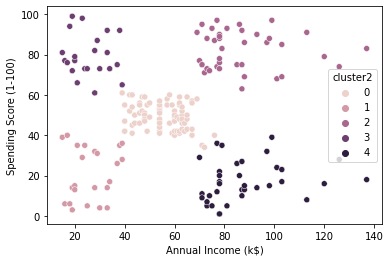

In [392]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster2',data=df)

Here what we can ineterpret is 

cluster 0 valued customers have medium income and medium spendings.

cluster 1 valued customers have more income but less spendings.

cluster 2 valued customers have less income but more spendings.

cluster 3 valued customers have less income and less spendigs.

cluster 4 valued customers have more income and more spendings.

In [393]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster1,cluster2
0,1,Male,19,15,39,0,0,1
1,2,Male,21,15,81,0,0,3
2,3,Female,20,16,6,0,0,1
3,4,Female,23,16,77,0,0,3
4,5,Female,31,17,40,0,0,1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1,2
196,197,Female,45,126,28,1,2,4
197,198,Male,32,126,74,1,1,2
198,199,Male,32,137,18,1,2,4


# HIERARCHICAL CLUTERING

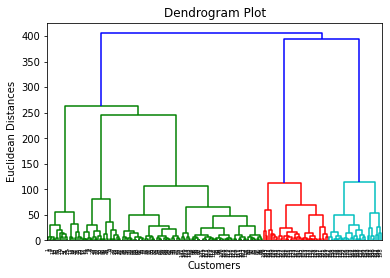

In [394]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

Importing scipy.cluster.hierarchy for hierarchical clustering algorithm

Using schndendogram to create dendrogram which helps in selecting the best number of clusters.

shc.linkage is used for linking the related parameters using method called ward.

By seeing the dendrogram we can say that the clusters used for clustering is 5.

In [395]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster1,cluster2
0,1,Male,19,15,39,0,0,1
1,2,Male,21,15,81,0,0,3
2,3,Female,20,16,6,0,0,1
3,4,Female,23,16,77,0,0,3
4,5,Female,31,17,40,0,0,1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1,2
196,197,Female,45,126,28,1,2,4
197,198,Male,32,126,74,1,1,2
198,199,Male,32,137,18,1,2,4


In [396]:
x = df.iloc[:, [3, 4]].values  

Giving the parameters to the x and the parameters are "Annual Income (k$)",	"Spending Score (1-100)".	





In [397]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_predh= hc.fit_predict(x)  

Importing AgglomerativeClustering from sklearn.cluster to perform clustering to the data.

Calling the AgglomerativeClustering and using clusters=5 and affinity is euclidean distance usinng linkage method ward as used for preparing dendrogram too.

Fitting the predicted values in y_predh

In [398]:
y_predh

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

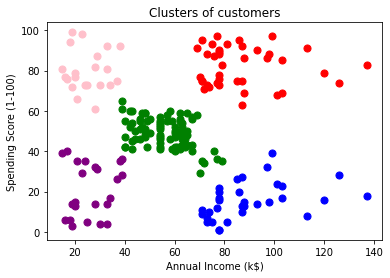

In [399]:
plt.scatter(x[y_predh == 0, 0], x[y_predh == 0, 1], s = 50, c = 'blue', label = 'Cluster 0')  
plt.scatter(x[y_predh == 1, 0], x[y_predh == 1, 1], s = 50, c = 'green', label = 'Cluster 1')  
plt.scatter(x[y_predh== 2, 0], x[y_predh == 2, 1], s = 50, c = 'red', label = 'Cluster 2')  
plt.scatter(x[y_predh == 3, 0], x[y_predh == 3, 1], s = 50, c = 'pink', label = 'Cluster 3')  
plt.scatter(x[y_predh == 4, 0], x[y_predh == 4, 1], s = 50, c = 'purple', label = 'Cluster 4')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.show()  

Plotting the scatterplot using plotly and the ineterpretation for the scatterplot will be

cluster with color green ,customers have medium income and medium spendings.

cluster with color blue ,customers have more income but less spendings.

cluster with color pink, customers have less income but more spendings.

cluster with color purple, customers have less income and less spendigs.

cluster with color red customers have more income and more spendings.


So the best number of Clusters to be taken for the dataset is 5